# Five Indicators To Build A Trend Following Strategy

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [4]:
# input
symbol = 'AMD'
start = '2007-01-01'
end = '2018-12-31'

# Read data 
data = yf.download(symbol,start,end)

# View Columns
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,20.080000,20.400000,19.350000,19.520000,19.520000,28350300
2007-01-04,19.660000,19.860001,19.320000,19.790001,19.790001,23652500
2007-01-05,19.540001,19.910000,19.540001,19.709999,19.709999,15902400
2007-01-08,19.709999,19.860001,19.370001,19.469999,19.469999,15814800
2007-01-09,19.450001,19.709999,19.370001,19.650000,19.650000,14494200


## SMA and EMA

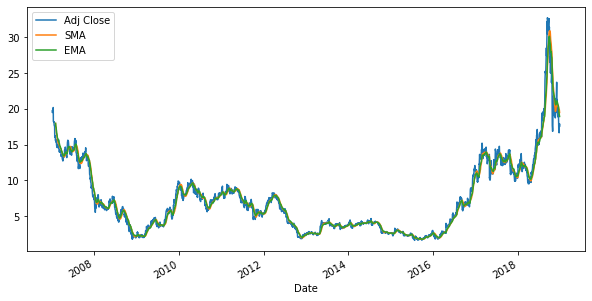

In [5]:

#Simple Moving Average
data['SMA'] = ta.SMA(data['Adj Close'], timeperiod = 20)

# Exponential Moving Average
data['EMA'] = ta.EMA(data['Adj Close'], timeperiod = 20)

# Plot
data[['Adj Close','SMA','EMA']].plot(figsize=(10,5))
plt.show()

## Bollinger Bands

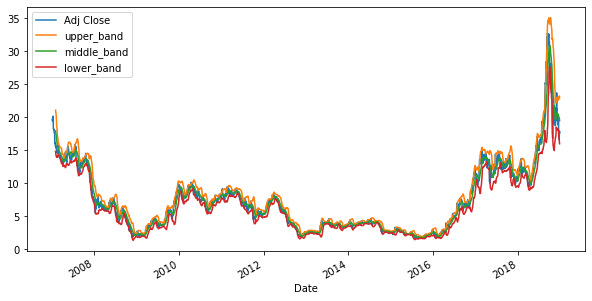

In [6]:
# Bollinger Bands
data['upper_band'], data['middle_band'], data['lower_band'] = ta.BBANDS(data['Adj Close'], timeperiod =20)

# Plot
data[['Adj Close','upper_band','middle_band','lower_band']].plot(figsize=(10,5))
plt.show()

## MACD (Moving Average Convergence Divergence)

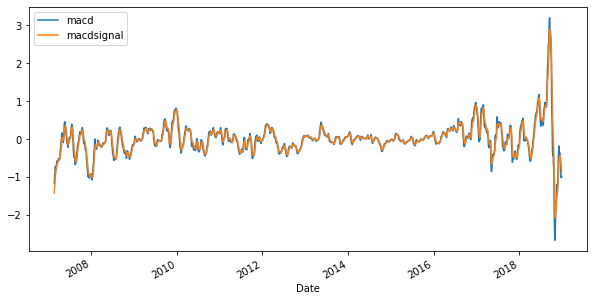

In [7]:
# MACD
data['macd'], data['macdsignal'], data['macdhist'] = ta.MACD(data['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
data[['macd','macdsignal']].plot(figsize=(10,5))

plt.show()

## RSI (Relative Strength Index)

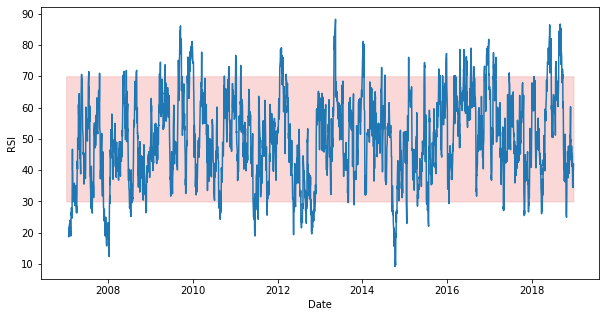

In [10]:
# RSI
data['RSI'] = ta.RSI(data['Adj Close'], timeperiod=14)
# Plotting RSI
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(data.index, data.RSI, label='RSI')
ax.fill_between(data.index, y1=30, y2=70, color = 'lightcoral', alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('RSI')
plt.show()

## OBV (On Balance Volume)

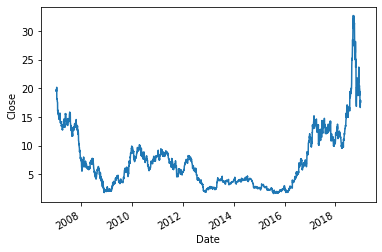

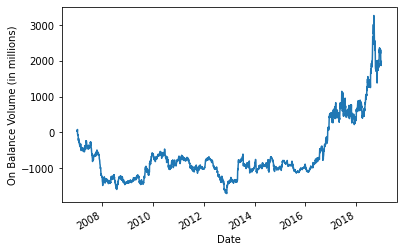

In [9]:
# OBV
data['OBV'] = ta.OBV(data['Adj Close'], data['Volume'])/10**6

data['Adj Close'].plot()
plt.ylabel('Close')
plt.show()

data.OBV.plot()
plt.ylabel('On Balance Volume (in millions)')
plt.show()